In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting and visualozing data

In [114]:
# our dataset
fruits=pd.read_csv('fruitsdata.csv')
print(fruits.head())
fruits.rename( columns={'fruit_name': 'Name', 'fruit_subtype': 'Type',
                     'fruit_label':'Label','color_score':'Color'}, inplace=True)

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79


In [115]:
# checking first ten rows of our dataset
fruits.head(10)

,Label,Name,Type,mass,width,height,Color
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [116]:
fruits.shape

(59, 7)

In [117]:
##Grouping the objects on the basis of their name and counting the rows under each category
fruits_counts=fruits.groupby('Name')['Label'].agg('count')
fruits_counts

Name
apple       19
lemon       16
mandarin     5
orange      19
Name: Label, dtype: int64

In [118]:
##Renaming of the cells
fruits['Type']=fruits['Type'].replace({'unknown': 'Other', 'braeburn':'Braeburn', 'cripps_pink': 'Cripps Pink',
                    'golden_delicious':'Golden Delicious', 'granny_smith': 'Granny Smith',
                    'spanish_belsan': 'Spanish Belsan', 'mandarin' : 'Mandarin', 'selected_seconds': 'Selected Seconds',
                    'spanish_jumbo': 'Spanish Jumbo', 'turkey_navel':'Turkey Navel'})
fruits['Name']=fruits['Name'].replace({'apple':'Apple', 'mandarin':'Mandarin','orange':'Orange','lemon':'Lemon'})
fruits.head(10)

,Label,Name,Type,mass,width,height,Color
0,1,Apple,Granny Smith,192,8.4,7.3,0.55
1,1,Apple,Granny Smith,180,8.0,6.8,0.59
2,1,Apple,Granny Smith,176,7.4,7.2,0.60
3,2,Mandarin,Mandarin,86,6.2,4.7,0.80
4,2,Mandarin,Mandarin,84,6.0,4.6,0.79
5,2,Mandarin,Mandarin,80,5.8,4.3,0.77
6,2,Mandarin,Mandarin,80,5.9,4.3,0.81
7,2,Mandarin,Mandarin,76,5.8,4.0,0.81
8,1,Apple,Braeburn,178,7.1,7.8,0.92
9,1,Apple,Braeburn,172,7.4,7.0,0.89


In [119]:
##Creating different dataframes to store values of different data
apple_file=fruits[fruits['Name']=='Apple']
lemon_file=fruits[fruits['Name']=='Lemon']
mandarin_file=fruits[fruits['Name']=='Mandarin']
orange_file=fruits[fruits['Name']=='Orange']

In [120]:
apple_file.head()

,Label,Name,Type,mass,width,height,Color
0,1,Apple,Granny Smith,192,8.4,7.3,0.55
1,1,Apple,Granny Smith,180,8.0,6.8,0.59
2,1,Apple,Granny Smith,176,7.4,7.2,0.60
8,1,Apple,Braeburn,178,7.1,7.8,0.92
9,1,Apple,Braeburn,172,7.4,7.0,0.89


In [121]:
orange_file.head()

,Label,Name,Type,mass,width,height,Color
24,3,Orange,Spanish Jumbo,342,9.0,9.4,0.75
25,3,Orange,Spanish Jumbo,356,9.2,9.2,0.75
26,3,Orange,Spanish Jumbo,362,9.6,9.2,0.74
27,3,Orange,Selected Seconds,204,7.5,9.2,0.77
28,3,Orange,Selected Seconds,140,6.7,7.1,0.72


In [122]:
lemon_file.head()

,Label,Name,Type,mass,width,height,Color
43,4,Lemon,Spanish Belsan,194,7.2,10.3,0.70
44,4,Lemon,Spanish Belsan,200,7.3,10.5,0.72
45,4,Lemon,Spanish Belsan,186,7.2,9.2,0.72
46,4,Lemon,Spanish Belsan,216,7.3,10.2,0.71
47,4,Lemon,Spanish Belsan,196,7.3,9.7,0.72


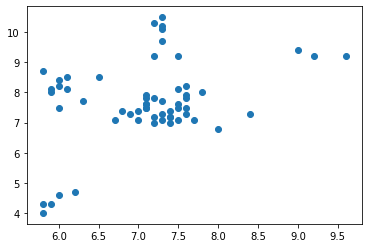

In [123]:
plt.scatter(fruits['width'],fruits['height'])

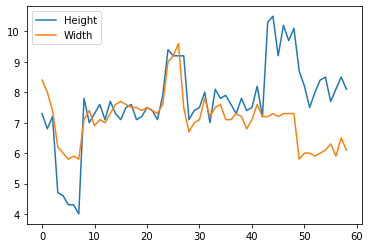

In [124]:
plt.plot(fruits['height'],label='Height')
plt.plot(fruits['width'],label='Width')
plt.legend()

In [125]:
##Using KNN Classifier algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [126]:
##Attributes required
attributes=['mass','width','height']
X=fruits[attributes]
X.head()

,mass,width,height
0,192,8.4,7.3
1,180,8.0,6.8
2,176,7.4,7.2
3,86,6.2,4.7
4,84,6.0,4.6


In [127]:
##Target variable
y=fruits.Label

In [128]:
##Splitting our dataframe into training and testing values for our model
train_X,test_X,train_y,test_y=train_test_split(X,y, test_size=0.2)

In [129]:
train_X.head()

,mass,width,height
47,196,7.3,9.7
27,204,7.5,9.2
34,142,7.6,7.8
2,176,7.4,7.2
44,200,7.3,10.5


In [130]:
test_X.head()

,mass,width,height
39,144,6.8,7.4
4,84,6.0,4.6
15,156,7.7,7.1
33,190,7.5,8.1
46,216,7.3,10.2


In [131]:
fruits_model=KNeighborsClassifier()

In [132]:
fruits_model.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [133]:
val_predict=fruits_model.predict(test_X)
val_predict

array([3, 2, 1, 4, 4, 3, 4, 1, 4, 3, 1, 3])

In [134]:
##For Accuracy of our model
acc=fruits_model.score(test_X,test_y)
print('The Accuracy of the model is:',round(acc*100,2),'%')

The Accuracy of the model is: 75.0 %
